In [8]:
import pandas as pd

In [19]:
dense_data = pd.read_csv("../data/cSBM_dense.csv")
sparse_data = pd.read_csv("../data/cSBM_sparse.csv")

models = dense_data["model"]
dense_data.drop(columns=[dense_data.columns[0], dense_data.columns[1]], inplace=True, axis=0)
sparse_data.drop(columns=[sparse_data.columns[0], sparse_data.columns[1]], inplace=True, axis=0)

def split_confidence(x, i):
    x = x.replace(" ", "")
    return float(x.split("+")[i])

dense_data_values = dense_data.applymap(lambda x: split_confidence(x, i=0))
dense_data_confidence = dense_data.applymap(lambda x: split_confidence(x, i=1))

sparse_data_values = sparse_data.applymap(lambda x: split_confidence(x, i=0))
sparse_data_confidence = sparse_data.applymap(lambda x: split_confidence(x, i=1))

print(dense_data_values.head(2))
print(dense_data_confidence.head(2))

      -1  -0.75   -0.5  -0.25      0   0.25    0.5   0.75      1
0  69.68  78.52  71.05  59.34  63.95  81.46  93.82  97.42  94.26
1  50.23  67.87  75.83  79.71  82.35  80.63  76.64  68.03  49.50
     -1  -0.75  -0.5  -0.25     0  0.25   0.5  0.75     1
0  0.29   0.34  0.21   0.25  0.27  0.24  0.18  0.14  0.08
1  0.28   0.28  0.32   0.23  0.20  0.25  0.20  0.28  0.16


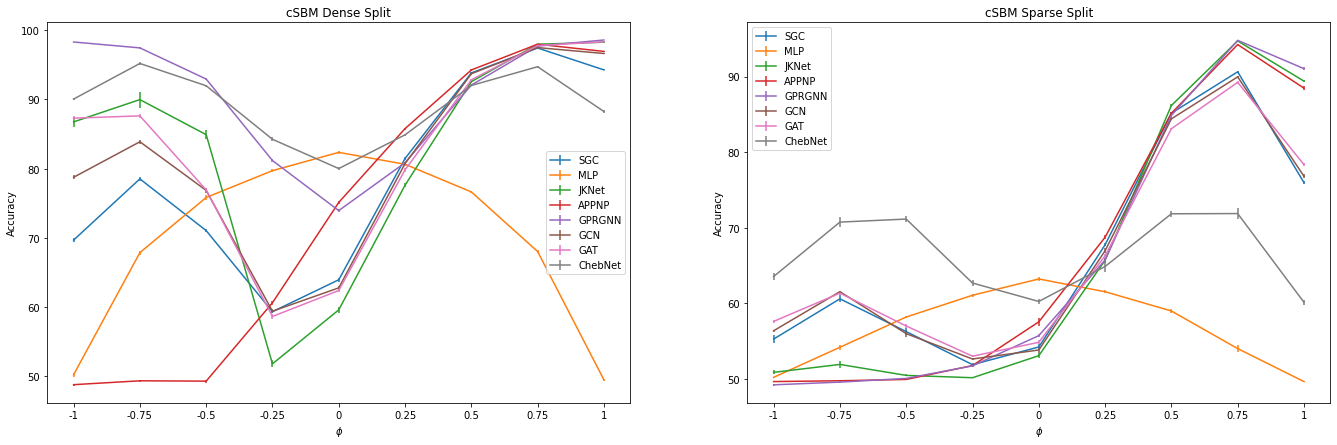

In [39]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(23, 7))
dense_data_values.T.plot.line(yerr=dense_data_confidence.T, ax=axs[0])
sparse_data_values.T.plot.line(yerr=sparse_data_confidence.T, ax=axs[1])
axs[0].legend(models.values)
axs[1].legend(models.values)
axs[0].set_xlabel("$\phi$")
axs[1].set_xlabel("$\phi$")
axs[0].set_ylabel("Accuracy")
axs[1].set_ylabel("Accuracy")
axs[0].set_title("cSBM Dense Split")
axs[1].set_title("cSBM Sparse Split")
plt.show()